##### Student Name: Nayem Alam
##### Student ID  : 260743549
##### Assignment 3

## Part 1.1 - Kmeans_EM
    Q. 1,2 - Kmeans_EM

### 1.1
### a) - kMeans
### Implement K-means clustering algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for clustering. Apply k-means to the provided image with K=2 and K=3. Display the resulting segmented images for 10 iterations in both cases.


In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy


# set global iterations 
maxIterations = 10

# Read and display images with openCV
picLoc = "./home.jpg"
home = cv2.imread(picLoc)
img = cv2.cvtColor(home, cv2.COLOR_BGR2RGB)

# convert image to list (1D)
imgHome = img.reshape((-1, 3))
imgHome = np.float32(imgHome)


#  ---- EXTRA FUNCTIONS ----
def getRandomCentroids(data, K):
    centroids = []
    for i in range(K):
        centroids.append(data[np.random.randint(0,np.max(data)-10)])
    return np.asarray(centroids)

# if it exceeds the maxiterations by any chance     
def MaxIterations(oldCentroids, centroids, N):
    if N > maxIterations: return True
    return oldCentroids == centroids

# find distance between data points and centroids
def EuclideanDistance(x,y, ax=1):
    #total = 0
    #for i in range(x.shape[0]):
        # total += np.sqrt(np.sum((x[i]-y[i])**2))
    return np.linalg.norm(x - y, axis=ax)

#  ---- END of EXTRA FUNCTIONS ----

#  ---- kMeans algorithm ----
def kMeans(data, K):
    centroids, oldCentroids = [], []
    
    # get intitial centroids
    centroids = getRandomCentroids(data, K)
#     print(centroids)
    
    # pick first center randomly 
    normal = np.zeros(centroids.shape) # save original state
    
    # get cluster points 
    clusters = np.zeros(len(data), dtype=int)

#     N = 0
#     oldCentroids = None
    
    for x in range(0,10): 
        
        for i in range(len(data)):
#             # the first label
#             first_centroid = EuclideanDistance(centroids[0], data[i])
#             label = 0 

            # get labels and calculate centroids
            closest_centroids = EuclideanDistance(data[i],centroids)
            # find closest centroid; closest centroid = label
            label = np.argmin(closest_centroids)
            clusters[i] = label
        
        # save state
        normal = deepcopy(centroids)
        
        # each centroid is the mean of the points in that centroid's label
        for i in range(K):
            points = [data[j] for j in range(len(data)) if clusters[j] == i]
            centroids[i] = np.mean(points, axis=0)
#             # if there is an empty centroid, re-initialize it
#             if(clusters == 0).any():
#                 centroids = MaxIterations(normal, centroids, 10)
    return clusters, centroids

#  ---- END of kMeans algorithm ----




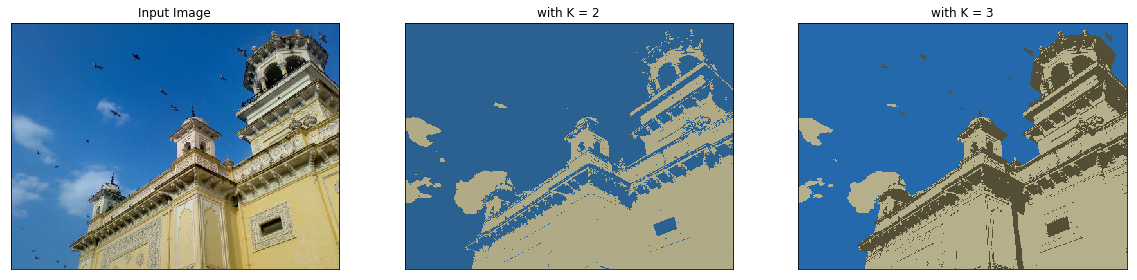

In [19]:
# load function
labels2, centers2 = kMeans(imgHome, 2)
labels3, centers3 = kMeans(imgHome, 3)

# convert back to uint8
centers2 = np.uint8(centers2)
centers3 = np.uint8(centers3)
segment2 = centers2[labels2.flatten()]
segment3 = centers3[labels3.flatten()]

# reshape images to original size
segment2 = segment2.reshape(img.shape)
segment3 = segment3.reshape(img.shape)

plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img)
plt.xticks([]), plt.yticks([]), plt.title("Input Image")
plt.subplot(132), plt.imshow(segment2)
plt.xticks([]), plt.yticks([]), plt.title("with K = 2")
plt.subplot(133), plt.imshow(segment3)
plt.xticks([]), plt.yticks([]), plt.title("with K = 3")

plt.show()

### b) EM
### Implement the EM algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images. Apply it to the given image with 2 and 3 Gaussian components. Display the resulting segmented images for 10 iterations in both cases.

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

# Read and display images with openCV
picLoc2 = "./home.jpg"
img2 = cv2.imread(picLoc2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# convert image to list (1D)
imgHome2 = np.float32(img2)
imgHome2 = imgHome2/255 # normalize for big valus
img_r = np.reshape(imgHome2, (imgHome2.shape[0]*imgHome2.shape[1],-1))


#  ---- EXTRA FUNCTIONS ----
# cov = covariance, mc = weight
def getRandomPoints(data, K, mean, cov, mc):
    clusters = []
    for i in range(K):
        mean[i] = data[np.random.randint(0,data.shape[0]-1)]
        cov[:] = np.eye(3)
        mc[:] = 1/K
    return mean,cov,mc


#  ---- END of EXTRA FUNCTIONS ----


#  ---- EM algorithm ----
"""
Following pseudocode given for multivariaete gaussian: https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php?fbclid=IwAR1wBb7E98B-qgMmsJKGcRO_VYW-r6o6Ak_BqNnd2PhGT2BZ0hsbRKUsVcU
"""
def EM(data,K):
    # mean, covariance, weight    
    mean = np.zeros((K,3))
    cov = np.zeros((K,3,3))
    weight = np.zeros((K))
    
    # initialize random gaussian points
    for i in range(K):
        mean[i] = data[np.random.randint(0,data.shape[0]-1)]
    cov[:] = np.eye(3)
    weight[:] = 1/K

    points = data.shape[0]
    diff = np.zeros(data.shape[0]) 
    
    # perform E-step and M-step as shown in link
    for i in range(10):
        probs = np.zeros((points,mean.shape[0]))

        # E-Step
        for j in range(points):
            for k in range(mean.shape[0]):
                diff = data[j]-mean[k] # xi-muc
                operand2 = (-1*(1/2))*(np.dot(np.transpose(diff),np.dot(diff,np.linalg.inv(cov[k]))))
                operand1 = weight[k]/(np.sqrt(2*np.pi)*np.sqrt(np.linalg.det(cov[k])))
                
                # N(xi,muc,SUMc) = multivariate gaussian
                capN = operand1*np.exp(operand2)
                probs[j][k] = capN
                
            # calculate for each datapoint, the probability that the datapoint belongs to cluster
            probs[j] = probs[j]/sum(probs[j])
        
        # M-Step
        # calculate total weight and update parameters
        newMean = np.zeros((K,3))
        newCov = np.zeros((K,3,3))
        newWeight = np.zeros(K) # total weight to calculate
        ProbOfPix = np.zeros((K)) # total probability 

        # sum of probabilities for each pixel
        # iterate through guassian points and then through pixels
        for j in range(K):
            for k in range(points):
                ProbOfPix[j] += probs[k][j]
        
        # calculate the new mean, cov, and weight
        # new mean
        for j in range(K):
            for k in range(points):
                newMean[j] += data[k]*probs[k][j]
            newMean[j] /= ProbOfPix[j]
                
        # new covariance
        for j in range(K):
            for k in range(points):
                diff = (data[k]-mean[j])[np.newaxis]
                newCov[j] += probs[k][j]*np.dot(np.transpose(diff), diff)
            newCov[j] /= ProbOfPix[j]
        
        # new weight
        for j in range(K):
            newWeight[j] = ProbOfPix[j]/points
            
        # calculate total weight       
        weight = newWeight
        # calculate total mean 
        mean = newMean
        # calculate total covariance
        cov = newCov
    
    return probs, mean
        
# debugger
# EM(img_r,1)

#  --- END of EM algorithm





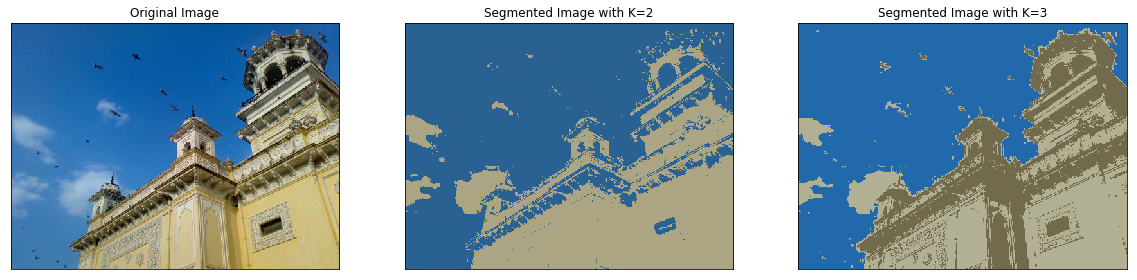

In [22]:
# get final outputs

# find EM
gLabel2, gMean2 = EM(img_r, 2)
gLabel3, gMean3 = EM(img_r, 3)

g2 = img_r.copy() 
for i in range(img_r.shape[0]):
    # find max probability at which index
    maxP_Idx = np.argmax(gLabel2[i])
    # final output gaussian w/k=2
    g2[i] = gMean2[maxP_Idx]
    # need to reshape to original image size
g2 = g2.reshape(imgHome2.shape)

g3 = img_r.copy() 
for i in range(img_r.shape[0]):
    maxP_Idx = np.argmax(gLabel3[i])

    # take the mean at the same index to calulate final image
    g3[i] = gMean3[maxP_Idx]
    # need to reshape to original image size
g3 = g3.reshape(imgHome2.shape)

plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img2)
plt.xticks([]), plt.yticks([]), plt.title("Original Image")
plt.subplot(132), plt.imshow(g2)
plt.xticks([]), plt.yticks([]), plt.title("Segmented Image with K=2")
plt.subplot(133), plt.imshow(g3)
plt.xticks([]), plt.yticks([]), plt.title("Segmented Image with K=3")
plt.show()

##### Notice: with EM (segmented image) displays a lot more detail than K-means

### c) Under what data distribution conditions would K-means and EM give the same solution, provided similar initializations?
K-means is basically iterating until convergence (to a local minimum), in relation to EM which is using the gaussian distribution, when each gaussian is spherical (i.e. mean = 0, identical covariance matrix) then K-means and EM will provide the same solution. Under that distribution the K-means is called a <i>soft</i> K-means <sup>[1](https://www.cs.toronto.edu/~jlucas/teaching/csc411/lectures/tut8_handout.pdf)</sup>. <br><br>
In other words, similar data points will output similar behaviour; the clusters in K-means are in a circular shape (or spherical in 3D), since these data points are circular, the nature of its output will produce a circular (or spherical) behaviour. Thus, to conclude, when each gaussian clusters in the data distribution are circular (or spherical) then the K-means and EM will yield the same solution.

